<a href="https://colab.research.google.com/github/denisddv/Projetos-Soulcode/blob/main/Projeto_Pandas_Mongo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iris Pires e Denis Dorneles

---



#Instalação de Bibliotecas

In [ ]:
pip install gcsfs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 2.4 MB/s eta 0:00:00


In [ ]:
pip install pandera

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Declaração das LIBS

In [ ]:
import pymongo
from pymongo import MongoClient

In [ ]:
import pandas as pd
import os
import numpy as np
from google.cloud import storage
import pandera as pa

#Configuração do Pandas

In [ ]:
pd.set_option('display.max_columns',100)

#Conector para Cloud Storage(bucket) e MongoDB(Atlas) 

In [ ]:
from pymongo import MongoClient

uri = "mongodb+srv://denisdorneles1.gh3fite.mongodb.net/?authSource=%24external&authMechanism=MONGODB-X509&retryWrites=true&w=majority"
client = MongoClient(uri, tls=True, tlsCertificateKeyFile='/content/X509-cert-1103583867613520106.pem')

db = client['soulcode']
colecaobruto = db['bruto']
doc_count = colecaobruto.count_documents({})
print(doc_count)


2240


In [ ]:
serviceAccount = '/content/prime-script-377819-8f05e5581164.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

In [ ]:
client = storage.Client()
bucket = client.get_bucket('denisdorneles1')
bucket.blob('marketing_campaign.csv')
path = 'gs://denisdorneles1/Brutos/marketing_campaign.csv - marketing_campaign.csv (1) - marketing_campaign.csv - marketing_campaign.csv (1).csv'

#Extração de dados(Extract)

In [ ]:
df = pd.read_csv(path)

#Pré Analise

In [ ]:
df

,ID,Ano_de_Nascimento,Educacao,Estado_Civil,Renda_Familiar,Criancas,Adolescentes,Data_Inscricao,Ultima_Compra,NumComprasVinho,MntFruits,NumComprasCarne,NumComprasPeixe,NumComprasDoces,QtdeProdOuro,NumOfertaCompras,NumComprasWeb,NumComprasCatalogo,NumComprasLoja,NumVisitasWebMes,AceitouCamp3,AceitouCamp4,AceitouCamp5,AceitouCamp1,AceitouCamp2,Reclamacoes,UltimaCampanha
0,5524,1957,Graduacao,Solteiro,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduacao,Solteiro,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduacao,Uniao Estavel,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduacao,Uniao Estavel,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,Pos-Doutorado,Casado,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduacao,Casado,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,Pos-Doutorado,Uniao Estavel,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduacao,Divorciado,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Mestre,Uniao Estavel,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0


#Envio dos dados brutos(Mongo)

In [ ]:
#NÃO UTILIZAR - JÁ FOI ENVIADO
df_dict = df.to_dict("records")

colecaobruto.insert_many(df_dict)

#Transformaçoes(Limpeza, conversão, etc)

In [ ]:
#Tipo de dados das Colunas
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [ ]:
#Backup dos dados brutos
dfback = df.copy()

In [ ]:
#Teste para Valores Unicos - Testamos todos as colunas para verificar se havia insconsistência. 
pd.unique(df['Renda_Familiar'])

array([58138., 46344., 71613., ..., 56981., 69245., 52869.])

In [ ]:
#Teste para Valores Unicos - Testamos todos as colunas para verificar se havia insconsistência. 
df.nunique()

ID                    2240
Ano_de_Nascimento       59
Educacao                 5
Estado_Civil             8
Renda_Familiar        1974
Criancas                 3
Adolescentes             3
Data_Inscricao         663
Ultima_Compra          100
NumComprasVinho        776
MntFruits              158
NumComprasCarne        558
NumComprasPeixe        182
NumComprasDoces        177
QtdeProdOuro           213
NumOfertaCompras        15
NumComprasWeb           15
NumComprasCatalogo      14
NumComprasLoja          14
NumVisitasWebMes        16
AceitouCamp3             2
AceitouCamp4             2
AceitouCamp5             2
AceitouCamp1             2
AceitouCamp2             2
Reclamacoes              2
UltimaCampanha           2
dtype: int64

In [ ]:
#Verificar dados Nulos , ausentes , etc
df.count()

ID                    2240
Ano_de_Nascimento     2240
Educacao              2240
Estado_Civil          2240
Renda_Familiar        2216
Criancas              2240
Adolescentes          2240
Data_Inscricao        2240
Ultima_Compra         2240
NumComprasVinho       2240
NumComprasFrutas      2240
NumComprasCarne       2240
NumComprasPeixe       2240
NumComprasDoces       2240
QtdeProdOuro          2240
NumOfertaCompras      2240
NumComprasWeb         2240
NumComprasCatalogo    2240
NumComprasLoja        2240
NumVisitasWebMes      2240
AceitouCamp3          2240
AceitouCamp4          2240
AceitouCamp5          2240
AceitouCamp1          2240
AceitouCamp2          2240
Reclamacoes           2240
UltimaCampanha        2240
dtype: int64

In [ ]:
#Tradução das Colunas
df.rename(columns={'Year_Birth':'Ano_de_Nascimento','MntFruits':'NumComprasFrutas','Education':'Educacao','Marital_Status':'Estado_Civil','Income':'Renda_Familiar','Kidhome':'Criancas','Teenhome':'Adolescentes','Dt_Customer':'Data_Inscricao','Recency':'Ultima_Compra','MntWines':'NumComprasVinho','MntMeatProducts':'NumComprasCarne','MntFishProducts':'NumComprasPeixe','MntSweetProducts':'NumComprasDoces','Complain':'Reclamacoes','Response':'UltimaCampanha','MntGoldProds':'QtdeProdOuro', 'NumDealsPurchases':'NumOfertaCompras', 'NumWebPurchases':'NumComprasWeb', 'NumCatalogPurchases':'NumComprasCatalogo', 'NumStorePurchases':'NumComprasLoja', 'NumWebVisitsMonth':'NumVisitasWebMes', 'AcceptedCmp3':'AceitouCamp3','AcceptedCmp4':'AceitouCamp4','AcceptedCmp5':'AceitouCamp5','AcceptedCmp1':'AceitouCamp1','AcceptedCmp2':'AceitouCamp2'},inplace=True)

In [ ]:
#Exclusão de colunas - Decidimos essas pelo motivo de possuir somente um valor.
df.drop(['Z_CostContact','Z_Revenue'],axis=1,inplace=True)

In [ ]:
#Tradução Células
df.loc[df.Educacao == 'Graduation',['Educacao']] = 'Graduacao'
df.loc[df.Educacao == 'PhD',['Educacao']] = 'Pos-Doutorado'
df.loc[df.Educacao == 'Basic',['Educacao']] = 'Educacao Basica'
df.loc[df.Educacao == 'Master',['Educacao']] = 'Mestre'
df.loc[df.Educacao == '2n Cycle',['Educacao']] = 'Especializacao'

In [ ]:
#Tradução Células
df.loc[df.Estado_Civil == 'Single',['Estado_Civil']] = 'Solteiro'
df.loc[df.Estado_Civil == 'Together',['Estado_Civil']] = 'Uniao Estavel'
df.loc[df.Estado_Civil == 'Married',['Estado_Civil']] = 'Casado'
df.loc[df.Estado_Civil == 'Divorced',['Estado_Civil']] = 'Divorciado'
df.loc[df.Estado_Civil == 'Widow',['Estado_Civil']] = 'Viuvo'
df.loc[df.Estado_Civil == 'Alone',['Estado_Civil']] = 'Sozinho'
df.loc[df.Estado_Civil == 'Absurd',['Estado_Civil']] = 'Não interessado em Informar'

In [ ]:
#Contagem dados Nulos , ausentes , etc
df.isna().sum()

ID                     0
Ano_de_Nascimento      0
Educacao               0
Estado_Civil           0
Renda_Familiar        24
Criancas               0
Adolescentes           0
Data_Inscricao         0
Ultima_Compra          0
NumComprasVinho        0
MntFruits              0
NumComprasCarne        0
NumComprasPeixe        0
NumComprasDoces        0
QtdeProdOuro           0
NumOfertaCompras       0
NumComprasWeb          0
NumComprasCatalogo     0
NumComprasLoja         0
NumVisitasWebMes       0
AceitouCamp3           0
AceitouCamp4           0
AceitouCamp5           0
AceitouCamp1           0
AceitouCamp2           0
Reclamacoes            0
UltimaCampanha         0
dtype: int64

In [ ]:
#Modificar NA para NaN - Motivo somente NaN é aceito no mongo
df.replace(pd.NA,np.NaN,inplace=True)

In [ ]:
#Verificar se foi todos modificados
df.groupby(['Renda_Familiar'],dropna=False).size().sort_values(ascending=False)

Renda_Familiar
NaN        24
7500.0     12
35860.0     4
47025.0     3
48432.0     3
           ..
42160.0     1
42081.0     1
42033.0     1
42021.0     1
51813.0     1
Length: 1975, dtype: int64

#Dados não Confiaveis

In [ ]:
#Agrupando dados para a analise
df.groupby(['Ano_de_Nascimento'],dropna=False).size().sort_values(ascending=False)

Ano_de_Nascimento
1976    89
1971    87
1975    83
1972    79
1970    77
1978    77
1973    74
1965    74
1969    71
1974    69
1956    55
1958    53
1979    53
1977    52
1952    52
1959    51
1968    51
1966    50
1954    50
1955    49
1960    49
1982    45
1963    45
1962    44
1967    44
1957    43
1951    43
1983    42
1986    42
1964    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1949    30
1989    30
1950    29
1988    29
1987    27
1948    21
1990    18
1947    16
1946    16
1991    15
1992    13
1945     8
1944     7
1943     7
1995     5
1993     5
1994     3
1996     2
1899     1
1941     1
1940     1
1900     1
1893     1
dtype: int64

In [ ]:
#Filtros dados
ft2021 = df.Ano_de_Nascimento == 1899
df.loc[ft2021]

,ID,Ano_de_Nascimento,Educacao,Estado_Civil,Renda_Familiar,Criancas,Adolescentes,Data_Inscricao,Ultima_Compra,NumComprasVinho,MntFruits,NumComprasCarne,NumComprasPeixe,NumComprasDoces,QtdeProdOuro,NumOfertaCompras,NumComprasWeb,NumComprasCatalogo,NumComprasLoja,NumVisitasWebMes,AceitouCamp3,AceitouCamp4,AceitouCamp5,AceitouCamp1,AceitouCamp2,Reclamacoes,UltimaCampanha
339,1150,1899,Pos-Doutorado,Uniao Estavel,83532.0,0,0,26-09-2013,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,0


In [ ]:
#Filtros dados
ft2023 = df.Ano_de_Nascimento == 1893

In [ ]:
#Filtros dados
ft2022 = df.Ano_de_Nascimento == 1900
df.loc[ft2022]

,ID,Ano_de_Nascimento,Educacao,Estado_Civil,Renda_Familiar,Criancas,Adolescentes,Data_Inscricao,Ultima_Compra,NumComprasVinho,MntFruits,NumComprasCarne,NumComprasPeixe,NumComprasDoces,QtdeProdOuro,NumOfertaCompras,NumComprasWeb,NumComprasCatalogo,NumComprasLoja,NumVisitasWebMes,AceitouCamp3,AceitouCamp4,AceitouCamp5,AceitouCamp1,AceitouCamp2,Reclamacoes,UltimaCampanha
192,7829,1900,Especializacao,Divorciado,36640.0,1,0,26-09-2013,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,0


In [ ]:
#Busca por ID - Analisando que tipo de erro estária acontecendo. Possível erro de digitação.
df.loc[339]

ID                             1150
Ano_de_Nascimento              1899
Educacao              Pos-Doutorado
Estado_Civil          Uniao Estavel
Renda_Familiar              83532.0
Criancas                          0
Adolescentes                      0
Data_Inscricao           26-09-2013
Ultima_Compra                    36
NumComprasVinho                 755
MntFruits                       144
NumComprasCarne                 562
NumComprasPeixe                 104
NumComprasDoces                  64
QtdeProdOuro                    224
NumOfertaCompras                  1
NumComprasWeb                     4
NumComprasCatalogo                6
NumComprasLoja                    4
NumVisitasWebMes                  1
AceitouCamp3                      0
AceitouCamp4                      0
AceitouCamp5                      1
AceitouCamp1                      0
AceitouCamp2                      0
Reclamacoes                       0
UltimaCampanha                    0
Name: 339, dtype: object

In [ ]:
#Busca por ID - Analisando que tipo de erro estária acontecendo. Pessoa sem interesse em responder corretamente
df.loc[192]

ID                              7829
Ano_de_Nascimento               1900
Educacao              Especializacao
Estado_Civil              Divorciado
Renda_Familiar               36640.0
Criancas                           1
Adolescentes                       0
Data_Inscricao            26-09-2013
Ultima_Compra                     99
NumComprasVinho                   15
MntFruits                          6
NumComprasCarne                    8
NumComprasPeixe                    7
NumComprasDoces                    4
QtdeProdOuro                      25
NumOfertaCompras                   1
NumComprasWeb                      2
NumComprasCatalogo                 1
NumComprasLoja                     2
NumVisitasWebMes                   5
AceitouCamp3                       0
AceitouCamp4                       0
AceitouCamp5                       0
AceitouCamp1                       0
AceitouCamp2                       0
Reclamacoes                        1
UltimaCampanha                     0
N

In [ ]:
#Busca por ID - Analisando que tipo de erro estária acontecendo. Possível erro de digitação.
df.loc[239]

ID                             11004
Ano_de_Nascimento               1893
Educacao              Especializacao
Estado_Civil                Solteiro
Renda_Familiar               60182.0
Criancas                           0
Adolescentes                       1
Data_Inscricao            17-05-2014
Ultima_Compra                     23
NumComprasVinho                    8
MntFruits                          0
NumComprasCarne                    5
NumComprasPeixe                    7
NumComprasDoces                    0
QtdeProdOuro                       2
NumOfertaCompras                   1
NumComprasWeb                      1
NumComprasCatalogo                 0
NumComprasLoja                     2
NumVisitasWebMes                   4
AceitouCamp3                       0
AceitouCamp4                       0
AceitouCamp5                       0
AceitouCamp1                       0
AceitouCamp2                       0
Reclamacoes                        0
UltimaCampanha                     0
N

#Criação do Schema de validação dos Dados

In [ ]:
#NÃO UTILIZAMOS ESSE COMANDO - Motivo disso foi que não achamos necessário por que dentro do df as datas utilizadas já estão no padrão brasileiro. Logo mantemos em string para validação.
pd.to_datetime(df['Data_Inscricao'])

In [ ]:
df.dtypes

ID                      int64
Ano_de_Nascimento       int64
Educacao               object
Estado_Civil           object
Renda_Familiar        float64
Criancas                int64
Adolescentes            int64
Data_Inscricao         object
Ultima_Compra           int64
NumComprasVinho         int64
NumComprasFrutas        int64
NumComprasCarne         int64
NumComprasPeixe         int64
NumComprasDoces         int64
QtdeProdOuro            int64
NumOfertaCompras        int64
NumComprasWeb           int64
NumComprasCatalogo      int64
NumComprasLoja          int64
NumVisitasWebMes        int64
AceitouCamp3            int64
AceitouCamp4            int64
AceitouCamp5            int64
AceitouCamp1            int64
AceitouCamp2            int64
Reclamacoes             int64
UltimaCampanha          int64
dtype: object

In [ ]:
schema = pa.DataFrameSchema(
    columns = {
        'ID':pa.Column(pa.Int),
        'Ano_de_Nascimento':pa.Column(pa.Int),
        'Educacao':pa.Column(pa.String),
        'Estado_Civil':pa.Column(pa.String),
        'Renda_Familiar':pa.Column(pa.Float,nullable=True),
        'Criancas':pa.Column(pa.Int),
        'Adolescentes':pa.Column(pa.Int),
        'Data_Inscricao':pa.Column(pa.String),
        'Ultima_Compra':pa.Column(pa.Int),
        'NumComprasVinho':pa.Column(pa.Int),
        'NumComprasFrutas':pa.Column(pa.Int),
        'NumComprasCarne':pa.Column(pa.Int),
        'NumComprasPeixe':pa.Column(pa.Int),
        'NumComprasDoces':pa.Column(pa.Int),
        'QtdeProdOuro':pa.Column(pa.Int),
        'NumOfertaCompras':pa.Column(pa.Int),
        'NumComprasWeb':pa.Column(pa.Int),
        'NumComprasCatalogo':pa.Column(pa.Int),
        'NumComprasLoja':pa.Column(pa.Int),
        'NumVisitasWebMes':pa.Column(pa.Int),
        'AceitouCamp3':pa.Column(pa.Int),
        'AceitouCamp4':pa.Column(pa.Int),
        'AceitouCamp5':pa.Column(pa.Int),
        'AceitouCamp1':pa.Column(pa.Int),
        'AceitouCamp2':pa.Column(pa.Int),
        'Reclamacoes':pa.Column(pa.Int),
        'UltimaCampanha':pa.Column(pa.Int),
})


In [ ]:
schema.validate(df)

,ID,Ano_de_Nascimento,Educacao,Estado_Civil,Renda_Familiar,Criancas,Adolescentes,Data_Inscricao,Ultima_Compra,NumComprasVinho,NumComprasFrutas,NumComprasCarne,NumComprasPeixe,NumComprasDoces,QtdeProdOuro,NumOfertaCompras,NumComprasWeb,NumComprasCatalogo,NumComprasLoja,NumVisitasWebMes,AceitouCamp3,AceitouCamp4,AceitouCamp5,AceitouCamp1,AceitouCamp2,Reclamacoes,UltimaCampanha
0,5524,1957,Graduacao,Solteiro,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduacao,Solteiro,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduacao,Uniao Estavel,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduacao,Uniao Estavel,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,Pos-Doutorado,Casado,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduacao,Casado,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,Pos-Doutorado,Uniao Estavel,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduacao,Divorciado,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Mestre,Uniao Estavel,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0


#Envio dos dados tratados para MongoDb e Cloud Storage

In [ ]:
from pymongo import MongoClient

uri = "mongodb+srv://denisdorneles1.gh3fite.mongodb.net/?authSource=%24external&authMechanism=MONGODB-X509&retryWrites=true&w=majority"
client = MongoClient(uri, tls=True, tlsCertificateKeyFile='/content/X509-cert-1103583867613520106.pem')

db = client['soulcode']
colecaotratado = db['tratado']
doc_count = colecaotratado.count_documents({})
print(doc_count)

2240


In [ ]:
#NÃO UTILIZAR - JÁ FOI ENVIADO
df_dict = df.to_dict("records")

colecaotratado.insert_many(df_dict)

In [ ]:
df.to_csv('gs://denisdorneles1/Tratados/campanhastratados.csv',index=False)

#Filtros e Agrupamentos para Insights

Verificamos a aceitação  das Campanhas utilizadas até o presente momento.

<AxesSubplot:ylabel='None'>

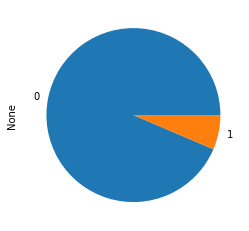

In [ ]:
df.groupby('AceitouCamp1',dropna=False).size().sort_values(ascending=False).plot.pie()

<AxesSubplot:ylabel='None'>

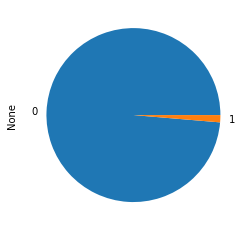

In [ ]:
df.groupby('AceitouCamp2',dropna=False).size().sort_values(ascending=False).plot.pie()

<AxesSubplot:ylabel='None'>

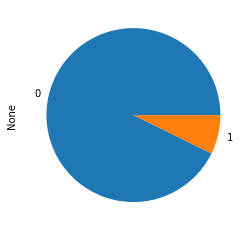

In [ ]:
df.groupby('AceitouCamp3',dropna=False).size().sort_values(ascending=False).plot.pie()

<AxesSubplot:ylabel='None'>

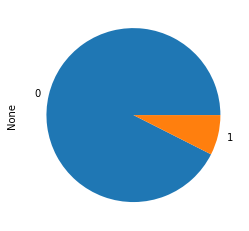

In [ ]:
df.groupby('AceitouCamp4',dropna=False).size().sort_values(ascending=False).plot.pie()

<AxesSubplot:ylabel='None'>

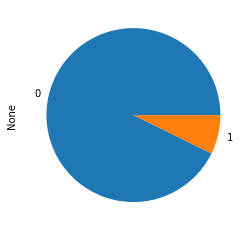

In [ ]:
df.groupby('AceitouCamp5',dropna=False).size().sort_values(ascending=False).plot.pie()

<AxesSubplot:ylabel='Não'>

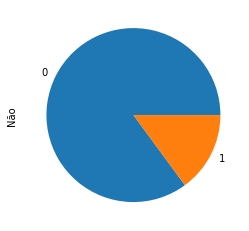

In [ ]:
df.groupby('UltimaCampanha',dropna=False).size().sort_values(ascending=False).plot.pie(xlabel='Sim',ylabel='Não')

Soma das Rendas Educação e Estado Civil

<AxesSubplot:xlabel='Estado_Civil'>

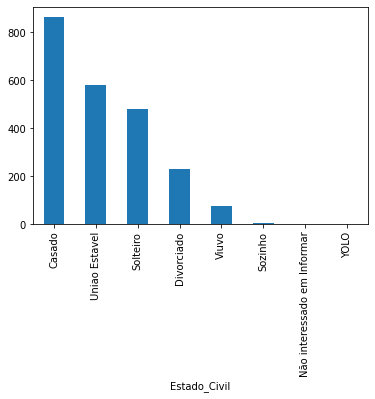

In [ ]:
df.groupby('Estado_Civil',dropna=False).size().sort_values(ascending=False).plot.bar()

In [ ]:
df_visual = df.groupby(['Educacao'])['Renda_Familiar'].sum().reset_index()
df_visual

,Educacao,Renda_Familiar
0,Educacao Basica,1096538.0
1,Especializacao,9526638.0
2,Graduacao,58835937.0
3,Mestre,19314900.0
4,Pos-Doutorado,27005896.0


In [ ]:
df.groupby(['Estado_Civil'])['Renda_Familiar'].sum().reset_index()

,Estado_Civil,Renda_Familiar
0,Casado,44328307.0
1,Divorciado,12257541.0
2,Não interessado em Informar,144731.0
3,Solteiro,24018810.0
4,Sozinho,131367.0
5,Uniao Estavel,30509691.0
6,Viuvo,4292598.0
7,YOLO,96864.0


Media dos itens da ultima campanha

In [ ]:
df_camp1 = df.groupby(['UltimaCampanha'])

In [ ]:
df_camp1

In [ ]:
df_camp1.mean()

,ID,Ano_de_Nascimento,Renda_Familiar,Criancas,Adolescentes,Ultima_Compra,NumComprasVinho,NumComprasFrutas,NumComprasCarne,NumComprasPeixe,NumComprasDoces,QtdeProdOuro,NumOfertaCompras,NumComprasWeb,NumComprasCatalogo,NumComprasLoja,NumVisitasWebMes,AceitouCamp3,AceitouCamp4,AceitouCamp5,AceitouCamp1,AceitouCamp2,Reclamacoes
UltimaCampanha,,,,,,,,,,,,,,,,,,,,,,,
0,5622.009444,1968.698846,50839.132767,0.462225,0.541448,51.514690,269.104407,24.216684,144.624344,34.980063,25.035152,40.968520,2.323190,3.911857,2.391920,5.736621,5.320567,0.045121,0.055089,0.037251,0.034103,0.005247,0.009444
1,5421.820359,1969.416168,60209.675676,0.341317,0.305389,35.383234,502.703593,38.203593,294.353293,52.050898,38.634731,61.446108,2.335329,5.071856,4.203593,6.095808,5.293413,0.230539,0.185629,0.275449,0.236527,0.059880,0.008982


Analise de pessoas com menos de 30 anos

In [ ]:
f1 = df.Ano_de_Nascimento > 1989
f2 = df.NumComprasVinho > 0
df.vinho = df.loc[f1 & f2]

<ipython-input-82-6e5d5f79b155>:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.vinho = df.loc[f1 & f2]


<AxesSubplot:xlabel='Estado_Civil'>

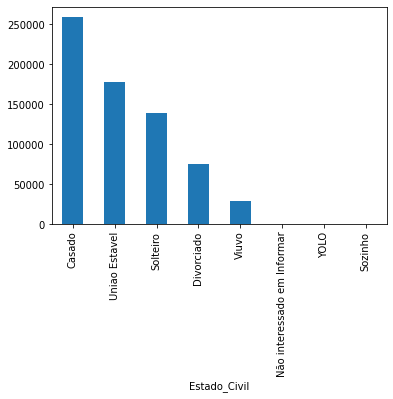

In [ ]:
df.groupby(['Estado_Civil'])['NumComprasVinho'].sum().sort_values(ascending=False).plot.bar()

<AxesSubplot:xlabel='Educacao'>

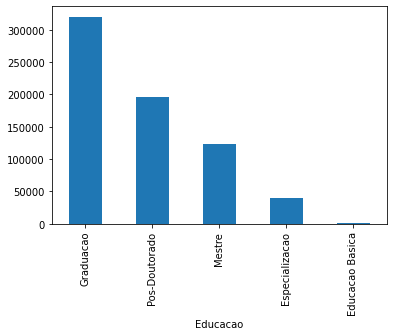

In [ ]:
df.groupby(['Educacao'])['NumComprasVinho'].sum().sort_values(ascending=False).plot.bar()